In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings("ignore")

In [3]:
mi = pd.read_csv('Myocardial infarction complications Database.csv')

In [4]:
mi

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [5]:
# from what we understand, every patient's recording is 'the time of admission to hospital'
# we decided to use that time moments, based on the information we know: the time of admission to hospital:
# all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be usedfor prediction
# be careful that the documentation is from 1 instead of 0
adfeatures = mi.drop(mi.columns[[0, 92, 93, 94, 99, 100, 101, 102, 103, 104, 112, 113, 114, 115,
                                116, 117, 118, 119, 120, 121, 122, 123]], axis=1)
adfeatures

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [6]:
adfeatures.shape

(1700, 102)

In [7]:
# However, there are many features are not numeric, because they use number to classify. They're actually categorical features.
# binary data was treated as categorical data; ordinal data was treated as continuous variables (numerical) for simpler interpretation. 
# reason from: https://www3.nd.edu/~rwilliam/stats3/OrdinalIndependent.pdf

print(adfeatures.dtypes) 

AGE           float64
SEX             int64
INF_ANAM      float64
STENOK_AN     float64
FK_STENOK     float64
               ...   
ANT_CA_S_n    float64
GEPAR_S_n     float64
ASP_S_n       float64
TIKL_S_n      float64
TRENT_S_n     float64
Length: 102, dtype: object


In [8]:
features = [0, *range(2,6), 7, 9, 10, *range(33,37), *range(43,47), 82, *range(84,91)]
categories = [i for i in range(adfeatures.columns.size) if not (i in features)]
numfeatures = adfeatures.iloc[:, features]
catfeatures = adfeatures.iloc[:, categories]
print(numfeatures)
print(catfeatures)

       AGE  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  DLIT_AG  ZSN_A  \
0     77.0       2.0        1.0        1.0       2.0  3.0      7.0    0.0   
1     55.0       1.0        0.0        0.0       0.0  0.0      0.0    0.0   
2     52.0       0.0        0.0        0.0       2.0  2.0      2.0    0.0   
3     68.0       0.0        0.0        0.0       2.0  2.0      3.0    1.0   
4     60.0       0.0        0.0        0.0       2.0  3.0      7.0    0.0   
...    ...       ...        ...        ...       ...  ...      ...    ...   
1695  77.0       0.0        4.0        2.0       1.0  2.0      7.0    0.0   
1696  70.0       0.0        6.0        2.0       1.0  2.0      7.0    0.0   
1697  55.0       3.0        6.0        2.0       2.0  0.0      0.0    0.0   
1698  79.0       2.0        2.0        2.0       1.0  2.0      7.0    NaN   
1699  63.0       2.0        NaN        NaN       NaN  2.0      NaN    4.0   

      S_AD_KBRIG  D_AD_KBRIG  ...  inf_im  post_im  K_BLOOD  NA_BLOOD  \
0 

In [9]:
numfeatures  # only 24 numerical features

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,S_AD_KBRIG,D_AD_KBRIG,...,inf_im,post_im,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S
0,77.0,2.0,1.0,1.0,2.0,3.0,7.0,0.0,NaN,NaN,...,0.0,0.0,4.7,138.0,NaN,NaN,NaN,8.0,16.0,4.0
1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,3.5,132.0,0.38,0.18,NaN,7.8,3.0,2.0
2,52.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,150.0,100.0,...,0.0,0.0,4.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0
3,68.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,NaN,NaN,...,1.0,0.0,3.9,146.0,0.75,0.37,NaN,NaN,NaN,2.0
4,60.0,0.0,0.0,0.0,2.0,3.0,7.0,0.0,190.0,100.0,...,0.0,0.0,3.5,132.0,0.45,0.22,NaN,8.3,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0.0,4.0,2.0,1.0,2.0,7.0,0.0,NaN,NaN,...,0.0,0.0,3.7,130.0,1.05,0.52,NaN,12.8,6.0,2.0
1696,70.0,0.0,6.0,2.0,1.0,2.0,7.0,0.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1697,55.0,3.0,6.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0
1698,79.0,2.0,2.0,2.0,1.0,2.0,7.0,NaN,NaN,NaN,...,NaN,NaN,3.1,136.0,0.45,0.45,NaN,7.5,4.0,2.0


In [10]:
catfeatures  # 78 categorical features, total 102 features

,SEX,IBS_NASL,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [11]:
#in-place command 
for c in catfeatures:
    adfeatures[c]=adfeatures[c].astype('object')

In [12]:
adfeatures[numfeatures.columns].describe()

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,S_AD_KBRIG,D_AD_KBRIG,...,inf_im,post_im,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S
count,1692.000000,1696.000000,1594.000000,1627.000000,1649.000000,1691.000000,1452.000000,1646.000000,624.000000,624.000000,...,1620.000000,1628.000000,1329.000000,1325.000000,1416.000000,1415.000000,4.000000,1575.000000,1497.000000,1574.000000
mean,61.856974,0.554835,2.316186,1.205286,1.160703,1.393258,3.340220,0.194411,136.907051,81.394231,...,1.014815,0.259214,4.191422,136.550943,0.481455,0.263717,2.000000,8.782914,13.444890,4.684244
std,11.259936,0.836801,2.440586,1.040814,0.801400,1.088803,3.098646,0.658722,34.997835,19.745045,...,1.404934,0.698850,0.754076,6.512120,0.387261,0.201802,1.095445,3.400557,11.296316,2.871044
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.300000,117.000000,0.030000,0.040000,1.200000,2.000000,1.000000,1.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,...,0.000000,0.000000,3.700000,133.000000,0.230000,0.150000,1.350000,6.400000,5.000000,2.000000
50%,63.000000,0.000000,1.000000,2.000000,1.000000,2.000000,3.000000,0.000000,140.000000,80.000000,...,0.000000,0.000000,4.100000,136.000000,0.380000,0.220000,1.600000,8.000000,10.000000,4.000000
75%,70.000000,1.000000,5.000000,2.000000,2.000000,2.000000,7.000000,0.000000,160.000000,90.000000,...,2.000000,0.000000,4.600000,140.000000,0.610000,0.330000,2.250000,10.450000,18.000000,7.000000
max,92.000000,3.000000,6.000000,4.000000,2.000000,3.000000,7.000000,4.000000,260.000000,190.000000,...,4.000000,4.000000,8.200000,169.000000,3.000000,2.150000,3.600000,27.900000,140.000000,9.000000


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'INF_ANAM'}>,
        <AxesSubplot:title={'center':'STENOK_AN'}>,
        <AxesSubplot:title={'center':'FK_STENOK'}>,
        <AxesSubplot:title={'center':'IBS_POST'}>],
       [<AxesSubplot:title={'center':'GB'}>,
        <AxesSubplot:title={'center':'DLIT_AG'}>,
        <AxesSubplot:title={'center':'ZSN_A'}>,
        <AxesSubplot:title={'center':'S_AD_KBRIG'}>,
        <AxesSubplot:title={'center':'D_AD_KBRIG'}>],
       [<AxesSubplot:title={'center':'S_AD_ORIT'}>,
        <AxesSubplot:title={'center':'D_AD_ORIT'}>,
        <AxesSubplot:title={'center':'ant_im'}>,
        <AxesSubplot:title={'center':'lat_im'}>,
        <AxesSubplot:title={'center':'inf_im'}>],
       [<AxesSubplot:title={'center':'post_im'}>,
        <AxesSubplot:title={'center':'K_BLOOD'}>,
        <AxesSubplot:title={'center':'NA_BLOOD'}>,
        <AxesSubplot:title={'center':'ALT_BLOOD'}>,
        <AxesSubplot:title={'center':'AST_

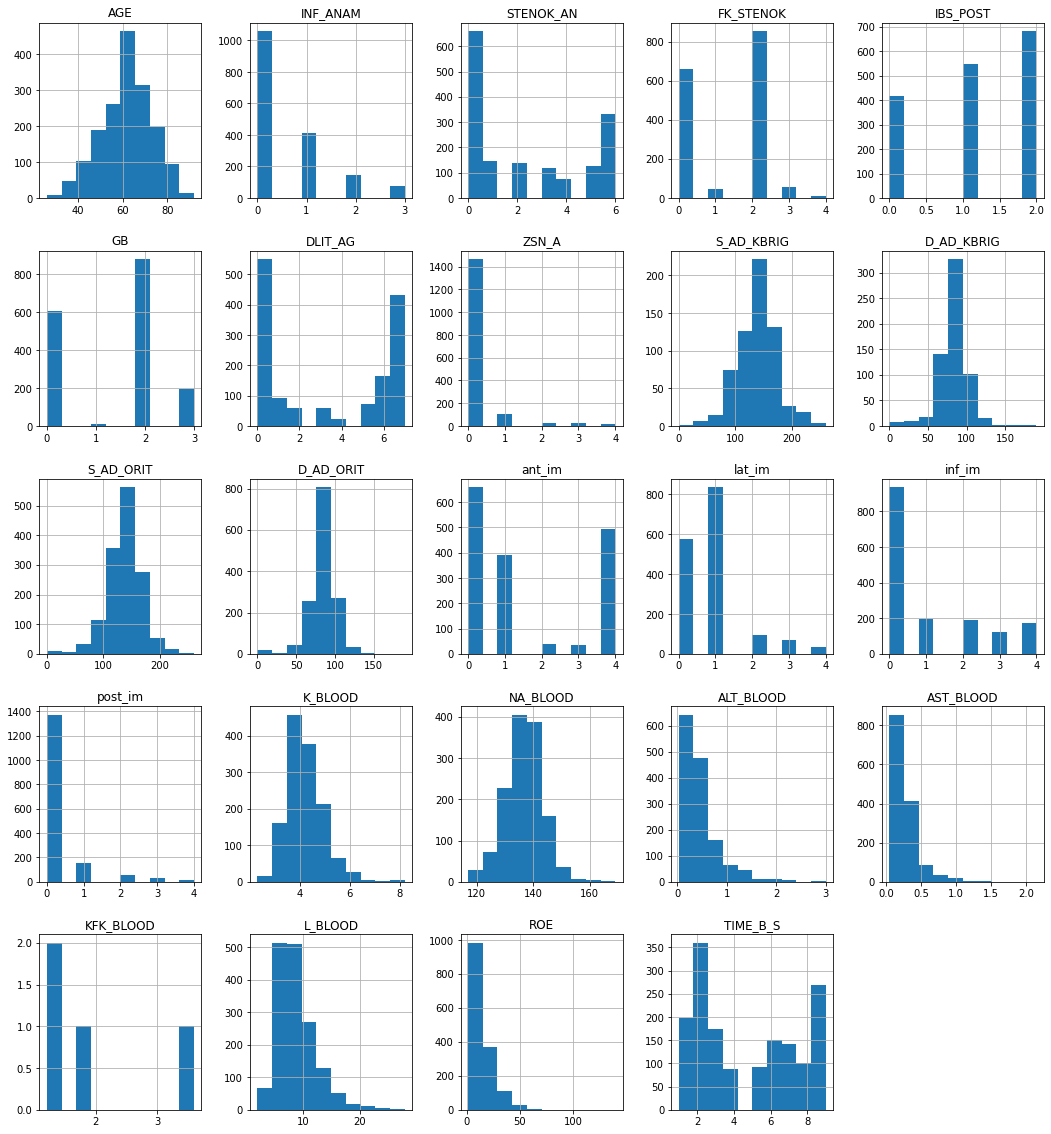

In [13]:
adfeatures[numfeatures.columns].hist(figsize=(18,20))

In [14]:
adfeatures[numfeatures.columns].isnull().sum()
#maybe throw too big missing fraction! ie.S_AD_KBRIG, D_AD_KBRIG, KFK_BLOOD (agreement: 50 % as the threshold)
#consider to impute missing data with medium for numerical features, not affected by abnormal values.

AGE              8
INF_ANAM         4
STENOK_AN      106
FK_STENOK       73
IBS_POST        51
GB               9
DLIT_AG        248
ZSN_A           54
S_AD_KBRIG    1076
D_AD_KBRIG    1076
S_AD_ORIT      267
D_AD_ORIT      267
ant_im          83
lat_im          80
inf_im          80
post_im         72
K_BLOOD        371
NA_BLOOD       375
ALT_BLOOD      284
AST_BLOOD      285
KFK_BLOOD     1696
L_BLOOD        125
ROE            203
TIME_B_S       126
dtype: int64

In [16]:
newnumfeatures = numfeatures.loc[:, (numfeatures.isnull().sum(axis=0) < 1700/2)]
newnumfeatures

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,S_AD_ORIT,D_AD_ORIT,...,lat_im,inf_im,post_im,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S
0,77.0,2.0,1.0,1.0,2.0,3.0,7.0,0.0,180.0,100.0,...,0.0,0.0,0.0,4.7,138.0,NaN,NaN,8.0,16.0,4.0
1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,...,1.0,0.0,0.0,3.5,132.0,0.38,0.18,7.8,3.0,2.0
2,52.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,180.0,100.0,...,1.0,0.0,0.0,4.0,132.0,0.30,0.11,10.8,NaN,3.0
3,68.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,120.0,70.0,...,1.0,1.0,0.0,3.9,146.0,0.75,0.37,NaN,NaN,2.0
4,60.0,0.0,0.0,0.0,2.0,3.0,7.0,0.0,160.0,90.0,...,1.0,0.0,0.0,3.5,132.0,0.45,0.22,8.3,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0.0,4.0,2.0,1.0,2.0,7.0,0.0,110.0,70.0,...,NaN,0.0,0.0,3.7,130.0,1.05,0.52,12.8,6.0,2.0
1696,70.0,0.0,6.0,2.0,1.0,2.0,7.0,0.0,50.0,0.0,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1697,55.0,3.0,6.0,2.0,2.0,0.0,0.0,0.0,70.0,50.0,...,1.0,0.0,0.0,NaN,NaN,0.23,0.15,8.3,13.0,1.0
1698,79.0,2.0,2.0,2.0,1.0,2.0,7.0,NaN,110.0,70.0,...,NaN,NaN,NaN,3.1,136.0,0.45,0.45,7.5,4.0,2.0


In [47]:
newnumfeatures.columns  # check if filter sucessfully

newnumfeatures.fillna(newnumfeatures.median(), inplace=True)
    
newnumfeatures  # check the result
newnumfeatures.isnull().sum() # check if no missing value

AGE          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
IBS_POST     0
GB           0
DLIT_AG      0
ZSN_A        0
S_AD_ORIT    0
D_AD_ORIT    0
ant_im       0
lat_im       0
inf_im       0
post_im      0
K_BLOOD      0
NA_BLOOD     0
ALT_BLOOD    0
AST_BLOOD    0
L_BLOOD      0
ROE          0
TIME_B_S     0
dtype: int64

                AGE  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST        GB  \
AGE        1.000000  0.098238   0.232969   0.198185  0.103516  0.235737   
INF_ANAM   0.098238  1.000000   0.330549   0.333040  0.211958  0.101402   
STENOK_AN  0.232969  0.330549   1.000000   0.763019  0.332914  0.133783   
FK_STENOK  0.198185  0.333040   0.763019   1.000000  0.385149  0.117894   
IBS_POST   0.103516  0.211958   0.332914   0.385149  1.000000  0.125133   
GB         0.235737  0.101402   0.133783   0.117894  0.125133  1.000000   
DLIT_AG    0.292543  0.131337   0.218586   0.165775  0.140211  0.775865   
ZSN_A      0.131705  0.167982   0.103871   0.139666  0.099838  0.059071   
S_AD_ORIT  0.043821 -0.087717   0.005214  -0.006883  0.005862  0.290698   
D_AD_ORIT -0.049489 -0.098458  -0.032924  -0.026874 -0.015079  0.240701   
ant_im    -0.017064 -0.091346  -0.073527  -0.051837 -0.015108 -0.040980   
lat_im    -0.082137 -0.092576  -0.080654  -0.078991 -0.033244 -0.060066   
inf_im     0.046824 -0.00

<AxesSubplot:>

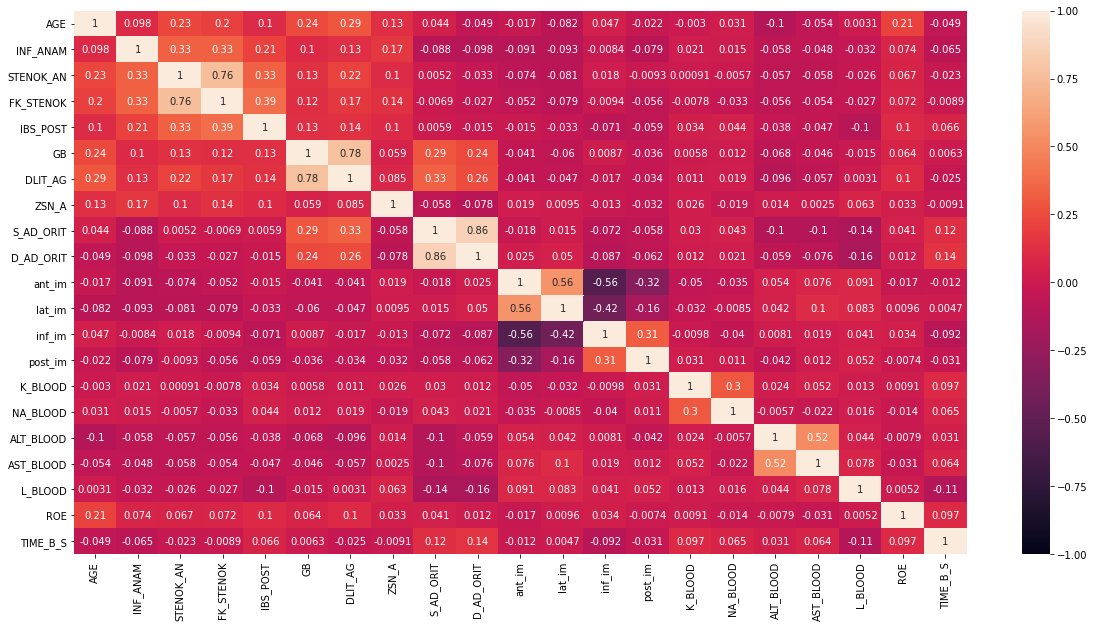

In [27]:
#Show the correlations between each two numeric variables; it seems not multi-co-linearity
plt.figure(figsize=(20,10))
print(adfeatures[newnumfeatures.columns].corr())
sns.heatmap(adfeatures[newnumfeatures.columns].corr(), vmin=-1, vmax=1, annot=True)


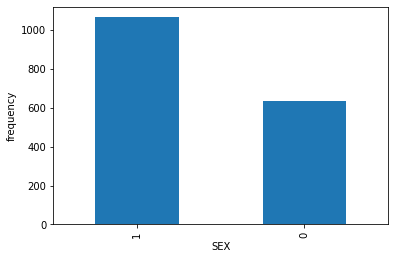

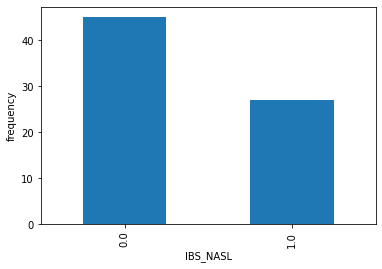

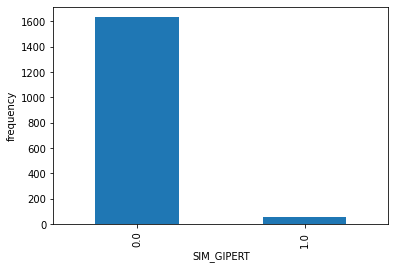

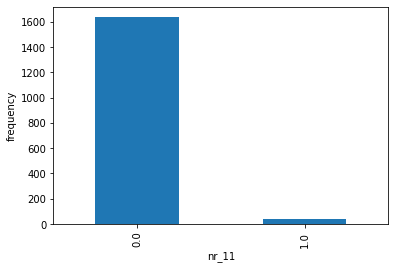

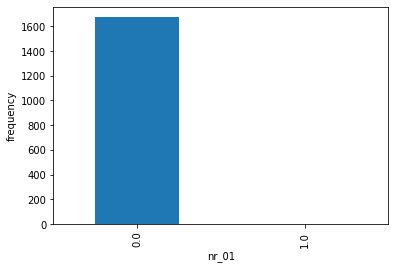

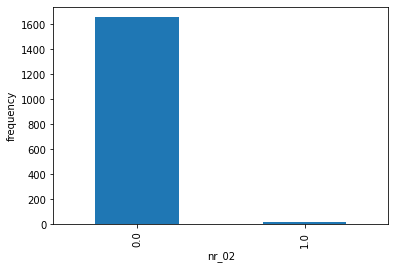

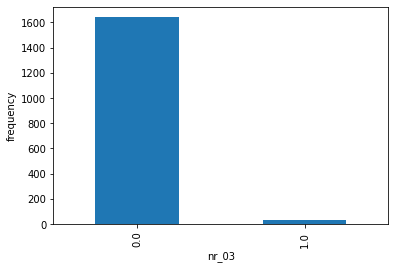

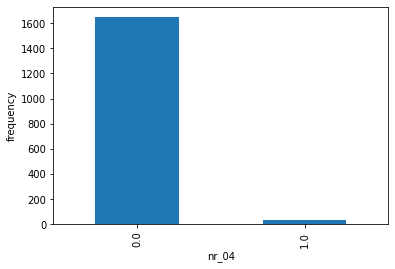

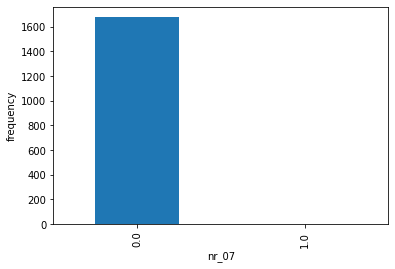

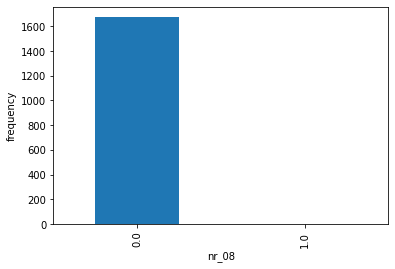

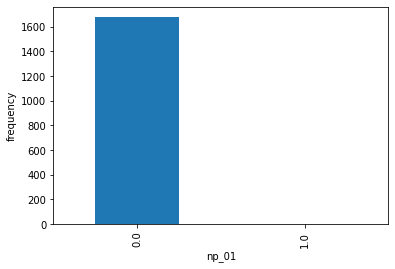

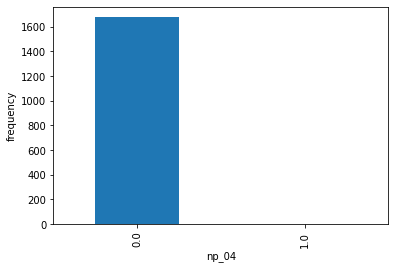

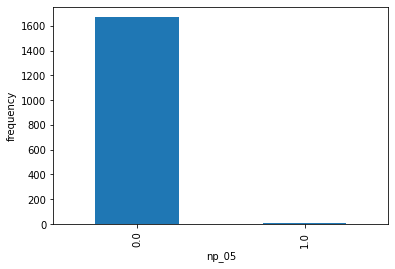

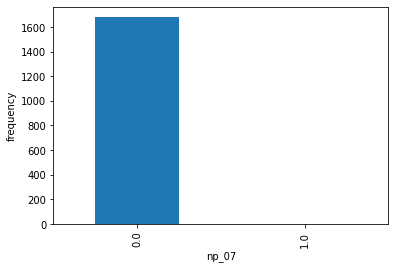

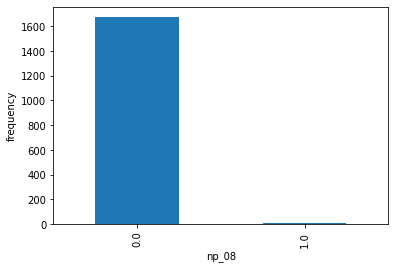

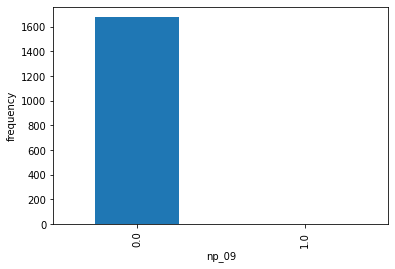

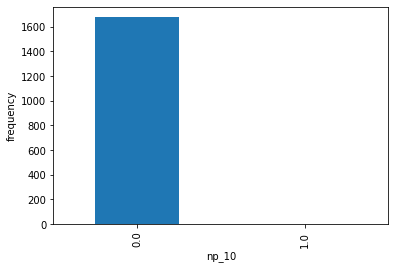

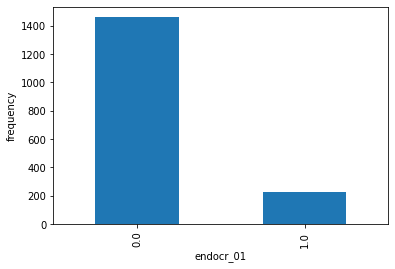

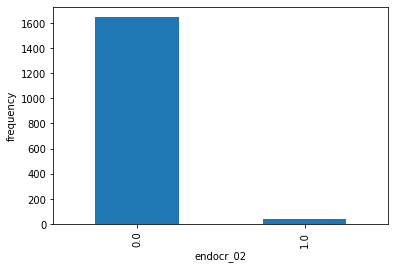

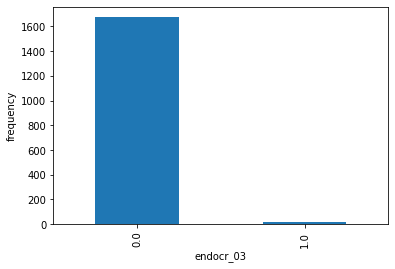

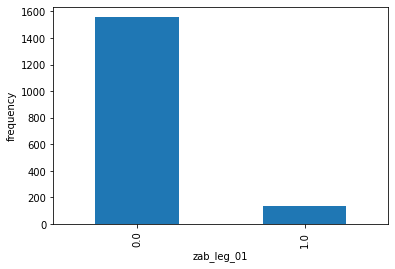

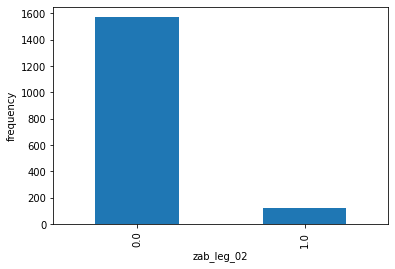

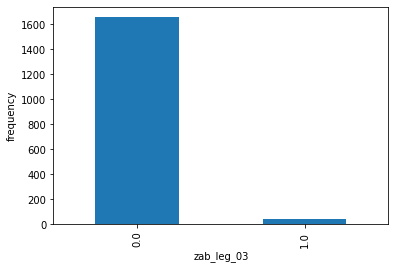

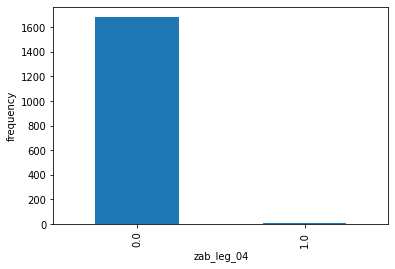

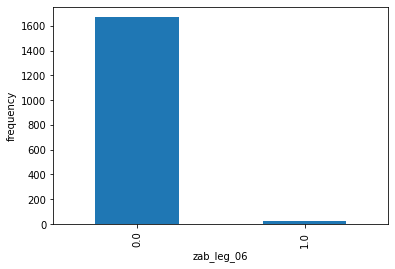

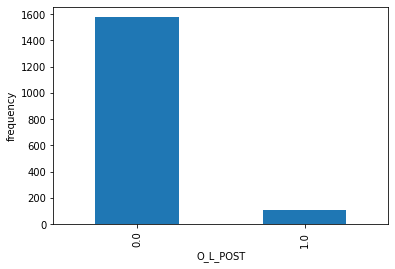

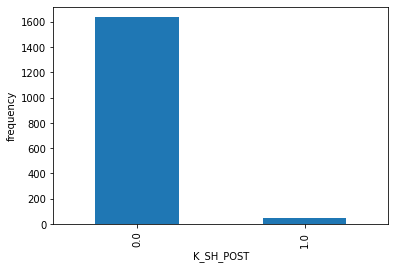

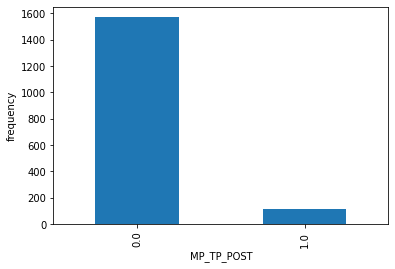

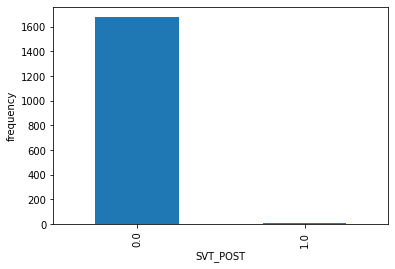

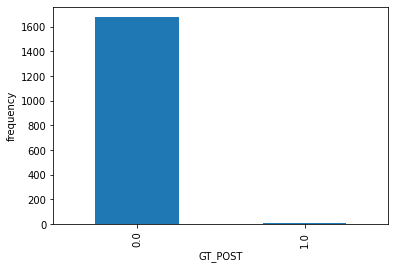

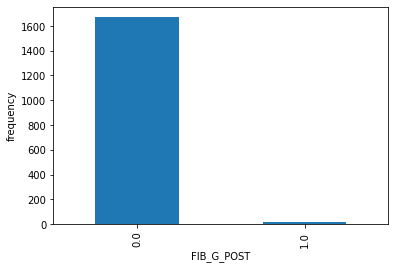

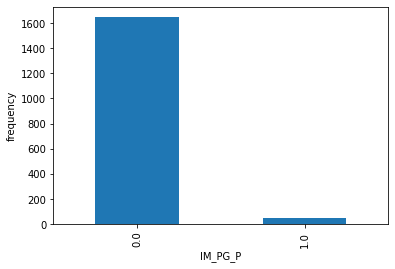

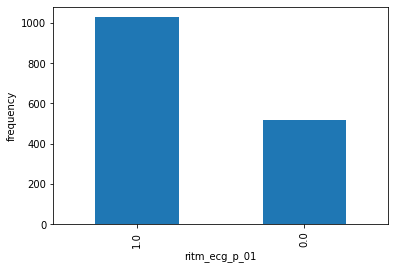

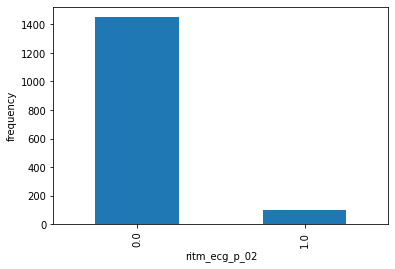

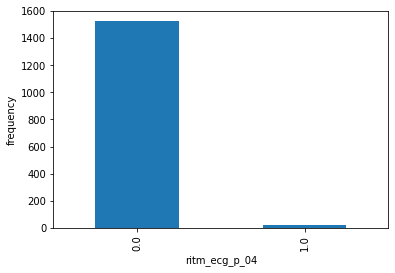

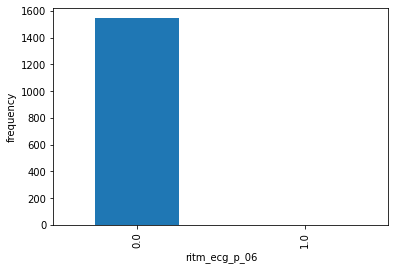

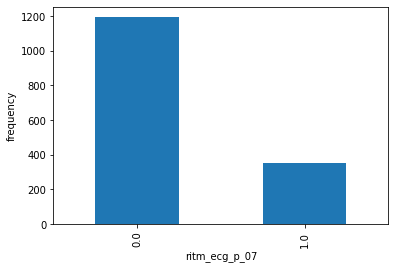

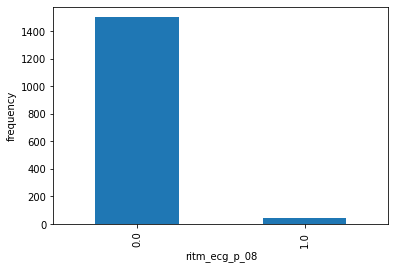

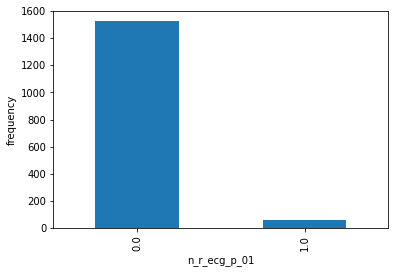

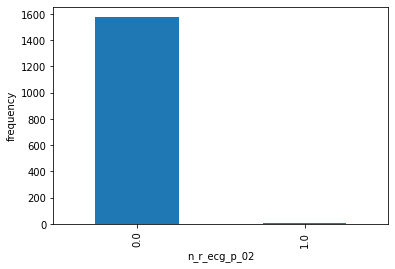

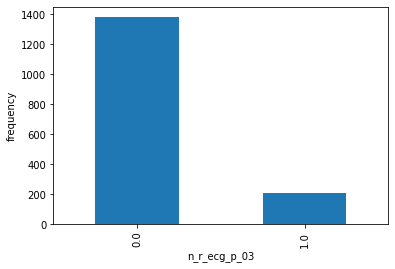

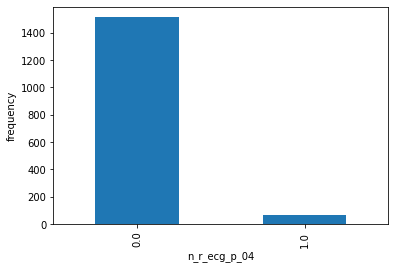

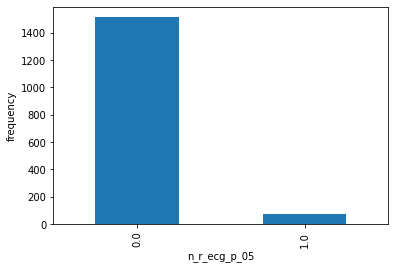

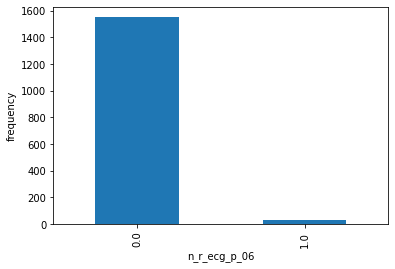

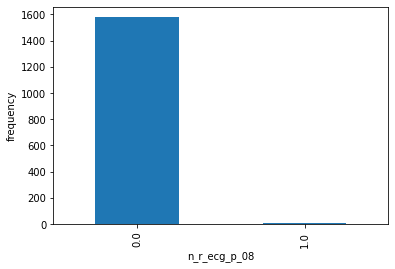

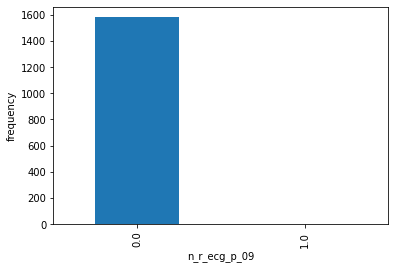

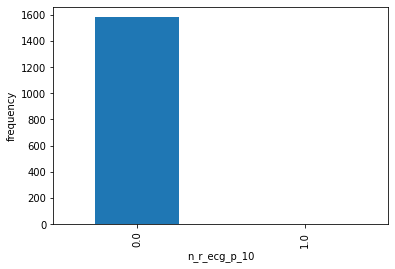

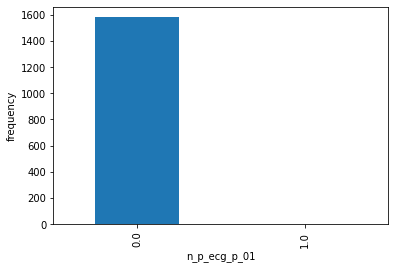

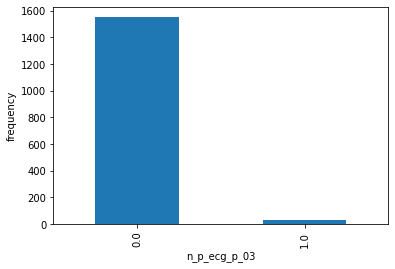

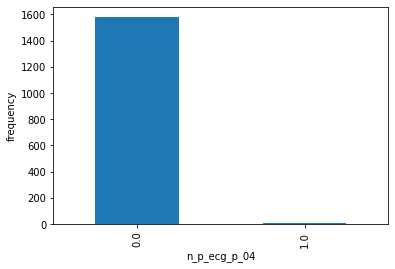

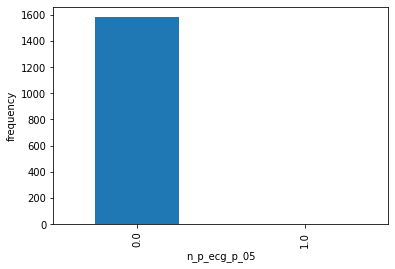

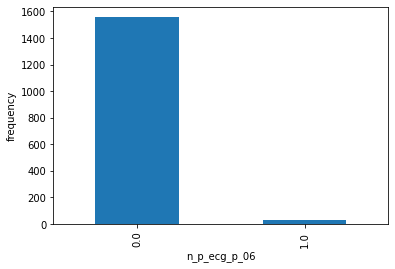

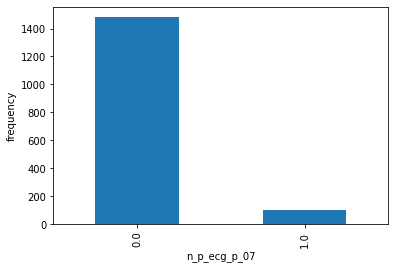

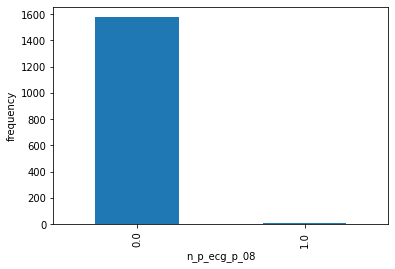

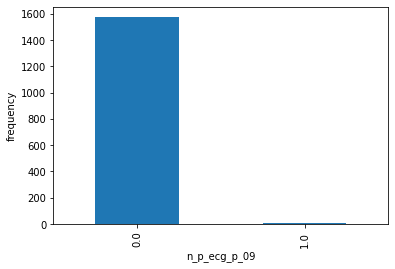

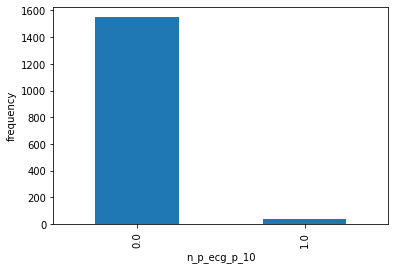

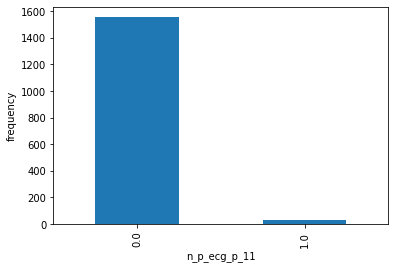

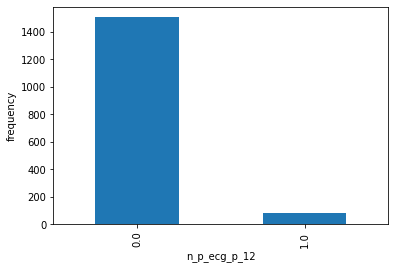

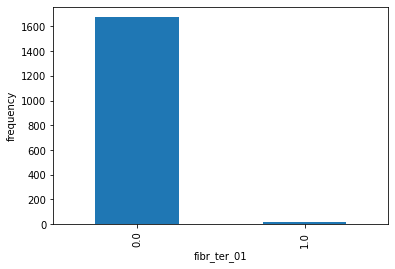

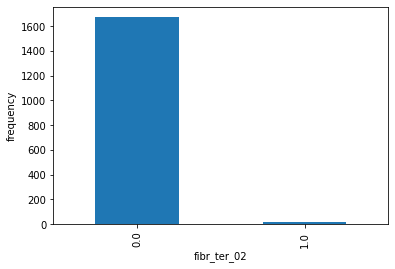

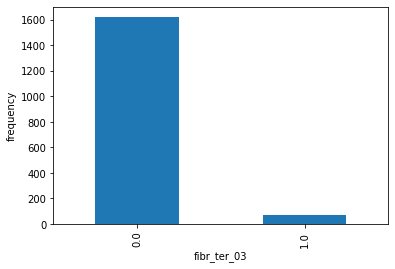

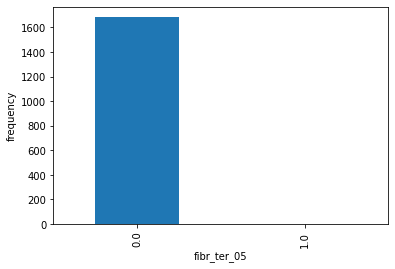

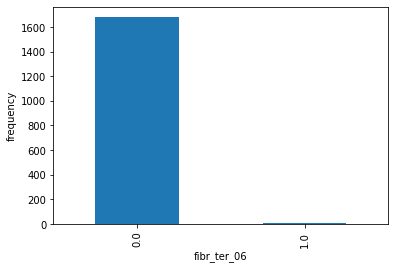

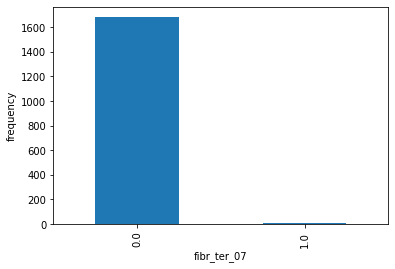

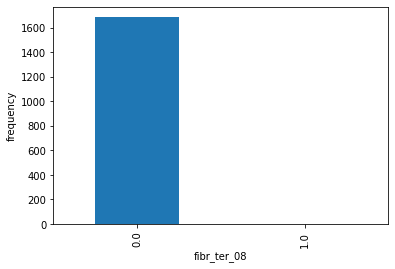

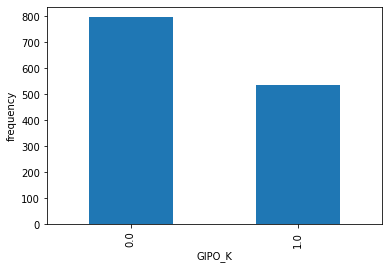

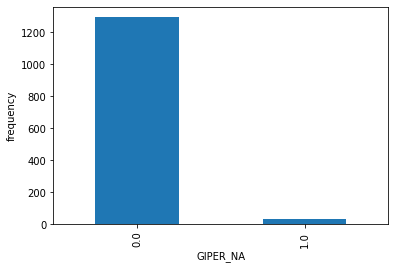

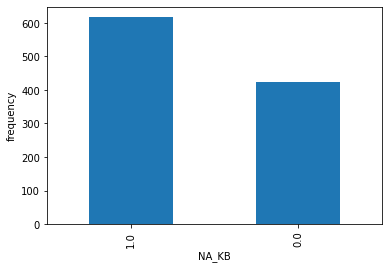

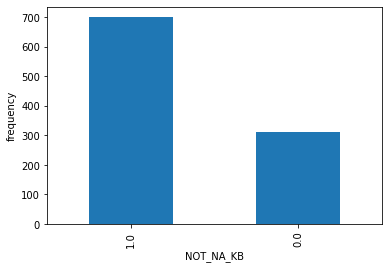

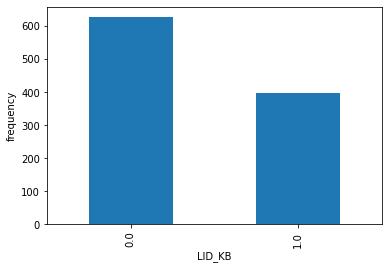

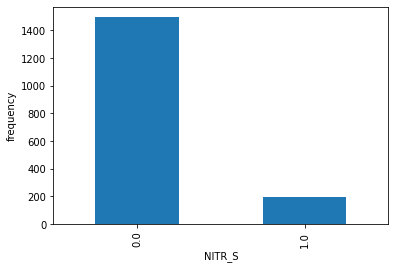

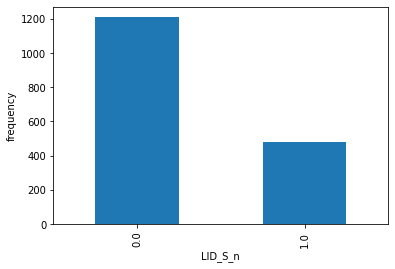

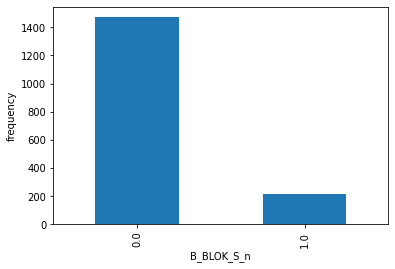

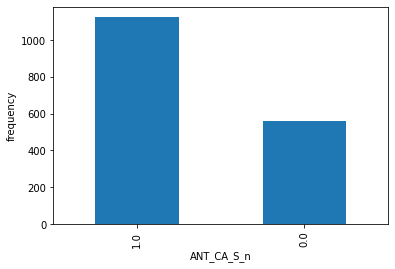

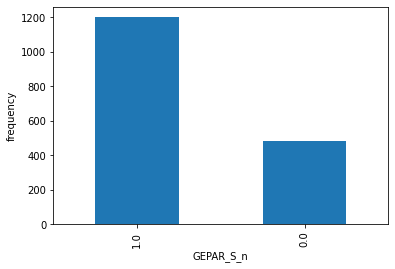

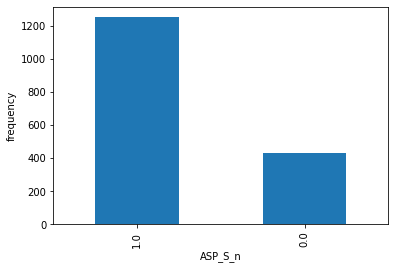

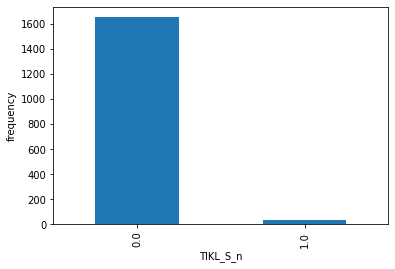

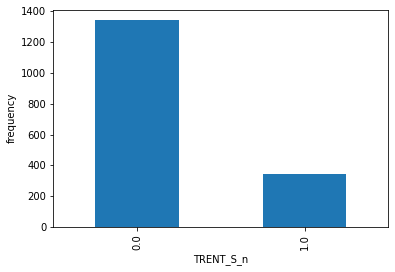

In [162]:
for c in catfeatures:
    adfeatures[c].value_counts().plot(kind='bar', xlabel=c, ylabel='frequency')
    plt.show()

In [54]:
adfeatures[catfeatures.columns].isnull().sum()
# throw too big missing fraction too. ie. IBS_NASL (agreement: 50 % as the threshold)
#consider to impute missing value with mode for cateforical features

SEX              0
IBS_NASL      1628
SIM_GIPERT       8
nr_11           21
nr_01           21
              ... 
ANT_CA_S_n      13
GEPAR_S_n       17
ASP_S_n         17
TIKL_S_n        16
TRENT_S_n       16
Length: 78, dtype: int64

In [55]:
newcatfeatures = catfeatures.loc[:, (catfeatures.isnull().sum(axis=0) < 1700/2)]
newcatfeatures

,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [57]:
for i in newcatfeatures:  # replace missing values with mode (agreement to keep it simple, although may introduces bias)
    newcatfeatures[i].fillna(newcatfeatures[i].mode()[0], inplace=True)
    
newcatfeatures  # check the result
newcatfeatures.isnull().sum() # check if no missing value

SEX           0
SIM_GIPERT    0
nr_11         0
nr_01         0
nr_02         0
             ..
ANT_CA_S_n    0
GEPAR_S_n     0
ASP_S_n       0
TIKL_S_n      0
TRENT_S_n     0
Length: 77, dtype: int64

## Understanding the outcome values (Complications and outcomes of myocardial infarction):

In [163]:
complications = mi[mi.columns[112:]]
complications

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0,0,0,1,0,1,0,0,0,0,3
1696,0,0,0,0,0,0,0,0,0,0,0,1
1697,0,0,0,0,0,0,0,0,0,1,0,6
1698,0,0,0,0,0,1,0,0,0,0,0,1


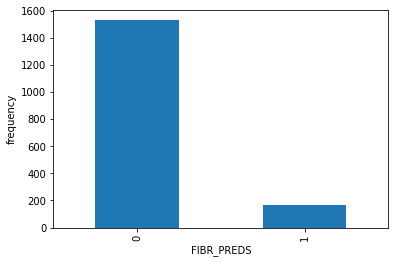

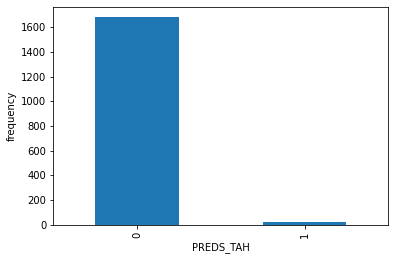

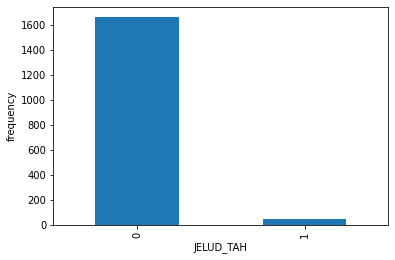

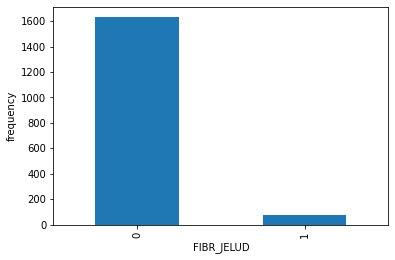

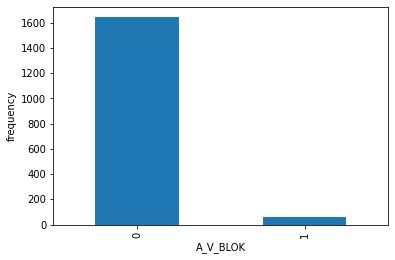

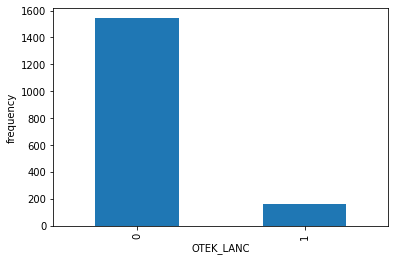

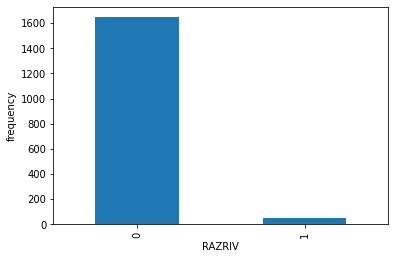

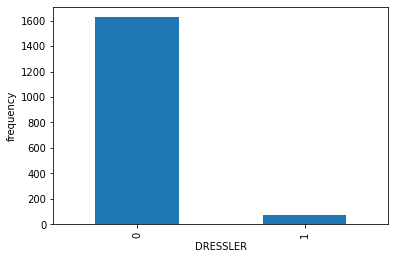

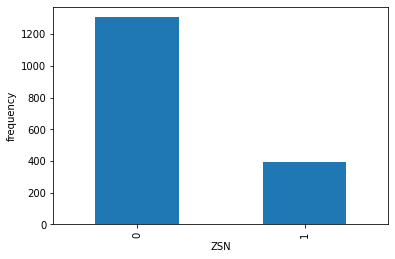

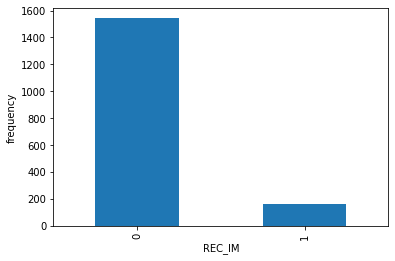

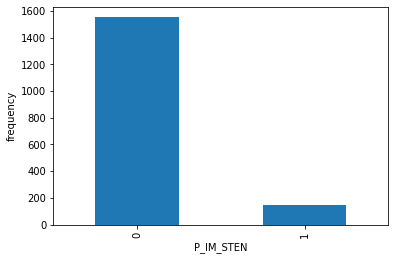

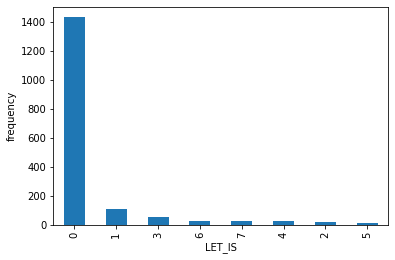

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FIBR_PREDS  1700 non-null   int64
 1   PREDS_TAH   1700 non-null   int64
 2   JELUD_TAH   1700 non-null   int64
 3   FIBR_JELUD  1700 non-null   int64
 4   A_V_BLOK    1700 non-null   int64
 5   OTEK_LANC   1700 non-null   int64
 6   RAZRIV      1700 non-null   int64
 7   DRESSLER    1700 non-null   int64
 8   ZSN         1700 non-null   int64
 9   REC_IM      1700 non-null   int64
 10  P_IM_STEN   1700 non-null   int64
 11  LET_IS      1700 non-null   int64
dtypes: int64(12)
memory usage: 159.5 KB


In [147]:
for co in complications:
    complications[co].value_counts().plot(kind='bar', xlabel=co, ylabel='frequency')
    plt.show()

complications.info()  #no null data
#Since we have multiple classes, we want to make our goal easier, so we decided to chose LET_IS, since this result can be 
#summarize that the patient is dead (except 0) or alive (0). We can combine them as binary data.
#goal: prediction of outcome based on patient information at the time of admission

In [151]:
complications.loc[complications.LET_IS !=0, "LET_IS"] = 1

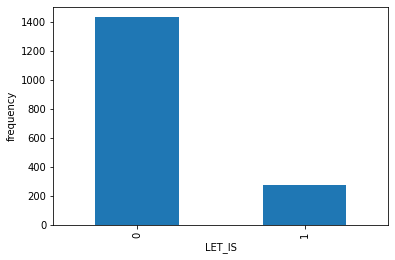

In [154]:
complications['LET_IS'].value_counts().plot(kind='bar', xlabel=co, ylabel='frequency')
plt.show()
# our target will be a Classification predictive modeling problem; in other words, we'll predict the patient is dead or alive (0) 